In [1]:
run compute_sides_ciilf.py

/Users/mbethermin/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
import pickle
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table

In [3]:
LF_array, logLmean, zcenlist, method = pickle.load(open('LFCIIarr_SIDES.p','rb'))

In [4]:
LFshape = np.shape(LF_array)

In [5]:
#Yue model
LF_Y19 = np.array([[1046795.1,0.041026074],
[1437632.0,0.033528175],
[2294535.8,0.024417553],
[3541862.0,0.017783798],
[5287809.0,0.013719493],
[8872825.0,0.009165234],
[1.3026406E7,0.0064868038],
[2.0446388E7,0.0047243065],
[3.4309272E7,0.0032480601],
[5.6618728E7,0.002298294],
[8.1751168E7,0.0017731657],
[1.24108632E8,0.0014077587],
[2.08251504E8,9.404457E-4],
[3.79890752E8,6.464639E-4],
[5.863785E8,4.4453473E-4],
[8.7536077E8,3.0570134E-4],
[1.24295962E9,2.2917945E-4],
[1.82478182E9,1.576095E-4],
[2.46437478E9,1.14822105E-4],
[3.38414464E9,8.127801E-5],
[5.1367301E9,5.1275296E-5],
[7.4159708E9,3.3294233E-5],
[9.3675438E9,2.2904012E-5],
[1.20320225E10,1.5755748E-5],
[1.54540646E10,1.0531397E-5],
[1.98497772E10,7.2445837E-6],
[2.68023255E10,4.0750438E-6],
[3.8689427E10,2.1638632E-6],
[5.0526179E10,1.2892579E-6],
[6.5984295E10,7.681566E-7],
[9.8469216E10,3.240957E-7],
[1.24362105E11,1.7716259E-7],
[1.91865455E11,6.1122634E-8],
[2.34364404E11,3.5390926E-8],
[2.95997473E11,1.9909994E-8]])



In [6]:
#Correction for the high-SFRD model
pcorr = np.poly1d([ 1.32063242e-02, -3.44720436e-01,  3.21803207e+00, -1.31490389e+01, 19.788931271994528])
corrz6 = 10.**(-1. * pcorr(6))
print(corrz6)

3.9844246735688817


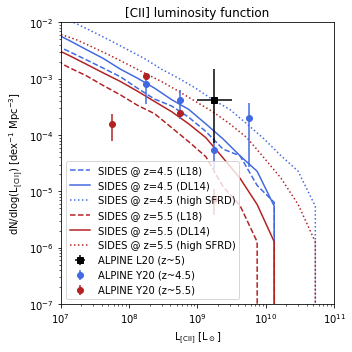

In [7]:
linestyle = ['--','-',':']

method = ['L18','DL14','DL14']

colors = ['royalblue','firebrick']

plt.figure(figsize = (5,5))

for i in range(0, 2): #redshift
    for j in range(0, LFshape[2]): #method
        plt.plot(10.**logLmean, LF_array[:,i,j], linestyle[j], color = colors[i], 
                 label = 'SIDES @ z={:0.1f} ('.format(zcenlist[i])+method[j]+')', zorder = 0)
        if j==1: #add the high SFRD model
            plt.plot(corrz6*10.**logLmean, LF_array[:,i,j], linestyle[2], color = colors[i], 
                 label = 'SIDES @ z={:0.1f} ('.format(zcenlist[i])+'high SFRD)', zorder = 0)
            
        
#Add Loiacono et al. 2020
plt.errorbar([10.**9.25], [10.**-3.37],
             xerr = [[10.**9.25-10.**9],[10.**9.5-10.**9.25]],
             yerr = [[10.**(-3.37)-10.**(-3.37-0.77)],[10.**(-3.37+0.55)-10.**(-3.37)]],
             fmt = 'ks', zorder = 2, label = 'ALPINE L20 (z~5)')#, yerr = [[-0.77,0.52]])
        
#Add Yan et al. 2020
L_Y20 = np.array([7.75,8.25,8.75,9.25,9.75])
LF_z4p5 = np.array([np.nan, 7.98,4.12,0.55,2.0])*1.e-4
eLF_z4p5 = np.array([np.nan, 4.45, 2.18,0.32,1.73])*1.e-4
LF_z5p5 = np.array([1.58,11.1,2.47,0.074,np.nan])*1.e-4
eLF_z5p5 = np.array([0.81,1.6,0.35,0.036,np.nan])*1.e-4

plt.errorbar(10.**L_Y20, LF_z4p5, yerr = eLF_z4p5, fmt ='o', color = 'royalblue', zorder = 1,
             label = 'ALPINE Y20 (z~4.5)')
plt.errorbar(10.**L_Y20, LF_z5p5, yerr = eLF_z5p5, fmt ='o', color = 'firebrick', zorder = 1,
             label = 'ALPINE Y20 (z~5.5)')
    

    
plt.yscale('log')
plt.xscale('log')
plt.xlim([1.e7,1.e11])
plt.ylim([1.e-7,1.e-2])

plt.xlabel(r'L$_{\rm [CII]}$ [L$_\odot$]')

plt.ylabel(r'dN/dlog(L$_{\rm [CII]}$) [dex$^{-1}$ Mpc$^{-3}$]')

plt.title('[CII] luminosity function', size = 12)

plt.legend(loc = 3)

plt.tight_layout()

plt.savefig('LFCII.pdf', dpi=150)

plt.show()

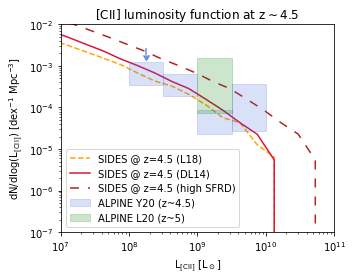

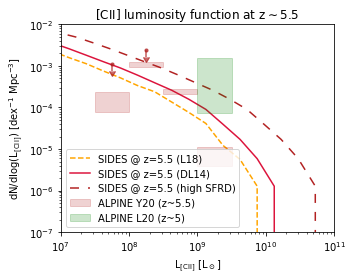

In [8]:
#New better plot!

linestyle = ['--','-']

method = ['L18','DL14','DL14']

colors = ['orange', 'crimson', 'firebrick']



for i in range(0, 2): #redshift
    
    leg = []
    lab = []
    
    plt.figure(figsize = (5,4))
    
    for j in range(0, LFshape[2]): #method
        sym, = plt.plot(10.**logLmean, LF_array[:,i,j], linestyle[j], color = colors[j], zorder = 0)
        leg.append(sym)
        lab.append('SIDES @ z={:0.1f} ('.format(zcenlist[i])+method[j]+')')
        if j==1: #add the high SFRD model
            sym, = plt.plot(corrz6*10.**logLmean, LF_array[:,i,j], linestyle = (0, (6, 6)), color = colors[2], zorder = 0)
            leg.append(sym)
            lab.append('SIDES @ z={:0.1f} ('.format(zcenlist[i])+'high SFRD)')
            
       #Add Yan et al. 2020
    L_Y20 = np.array([7.75,8.25,8.75,9.25,9.75])
    LF_z4p5 = np.array([np.nan, 7.98,4.12,0.55,2.0])*1.e-4
    eLF_z4p5 = np.array([np.nan, 4.45, 2.18,0.32,1.73])*1.e-4
    LF_z5p5 = np.array([1.58,11.1,2.47,0.074,np.nan])*1.e-4
    eLF_z5p5 = np.array([0.81,1.6,0.35,0.036,np.nan])*1.e-4
    
    if i == 0:
        for k in range(0, len(L_Y20)):
            Y20, = plt.fill([10.**(L_Y20[k]-0.25),10.**(L_Y20[k]+0.25),10.**(L_Y20[k]+0.25),10.**(L_Y20[k]-0.25)], 
                     [LF_z4p5[k]-eLF_z4p5[k], LF_z4p5[k]-eLF_z4p5[k],LF_z4p5[k]+eLF_z4p5[k],LF_z4p5[k]+eLF_z4p5[k]],
                     color = 'royalblue', alpha = 0.2)
            plt.errorbar(10.**L_Y20[1], 26.4e-4, yerr = 0.3*26.4e-4, uplims = True, color = 'royalblue', alpha = 0.2)
        lab.append('ALPINE Y20 (z~4.5)')
    if i == 1:
        for k in range(0, len(L_Y20)):
            Y20, = plt.fill([10.**(L_Y20[k]-0.25),10.**(L_Y20[k]+0.25),10.**(L_Y20[k]+0.25),10.**(L_Y20[k]-0.25)], 
                     [LF_z5p5[k]-eLF_z5p5[k], LF_z5p5[k]-eLF_z5p5[k],LF_z5p5[k]+eLF_z5p5[k],LF_z5p5[k]+eLF_z5p5[k]],
                     color = 'firebrick', alpha = 0.2)
            plt.errorbar(10.**L_Y20[0:2], [11e-4,24e-4], yerr = 0.3*np.array([11.e-4, 24e-4]), fmt = '.', uplims = True, color = 'firebrick', alpha = 0.2)
        lab.append('ALPINE Y20 (z~5.5)')
    leg.append(Y20)
    
        
#Add Loiacono et al. 2020
    sym, = plt.fill([1.e9, 10.**9.5, 10.**9.5, 1.e9], [10.**(-3.37-0.77), 10.**(-3.37-0.77), 10.**(-3.37+0.55), 10.**(-3.37+0.55)],
             'g', zorder = 2, alpha = 0.2, edgecolor = 'g')
    leg.append(sym)
    lab.append('ALPINE L20 (z~5)')
        
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim([1.e7,1.e11])
    plt.ylim([1.e-7,1.e-2])

    plt.xlabel(r'L$_{\rm [CII]}$ [L$_\odot$]')

    plt.ylabel(r'dN/dlog(L$_{\rm [CII]}$) [dex$^{-1}$ Mpc$^{-3}$]')

    plt.title(r'[CII] luminosity function at z$\sim${:0.1f}'.format(zcenlist[i]), size = 12)

    plt.legend(leg, lab, loc = 3)

    plt.tight_layout()

    if i == 0:
        plt.savefig('LFCII_z4p5.pdf'.format(zcenlist[i]), dpi=150)

    if i == 1:
        plt.savefig('LFCII_z5p5.pdf'.format(zcenlist[i]), dpi=150)
    
    plt.show()


In [9]:
#Load Dongwoo's LF at z=6
L_Dongwoo, phi_Dongwoo = np.loadtxt('Dongwoo_20211022_UMCII_z6LF.txt', unpack = True)

In [10]:
#Load Popping LF at z=4.5, 5.5, and 6

L_Popping, phi_Popping_4p5, phi_Popping_5p5, phi_Popping_6 = np.loadtxt('dndlogL_Popping.txt', unpack = True)

In [28]:
#compute Lagache & Cousin 2018 LF

box_volume = (100 / 0.7)**3 #Mpc3 (from the paper)

hdu = fits.open('Cousin_z6.fit')
tab_L18 = Table(hdu[1].data)

In [27]:
tab_L18

logMstar,logMgas,ZgOHindex,ZgmZ,logISRF,lognHI,logSFR,logSFRobs,logLIR,logLCII,logLCIIw,logLCIIww,logLCIIVa,logLAGN
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
8.313740000000001,8.063120000000001,8.66679,0.414903,5.044530000000001,3.5325300000000004,0.7592930000000001,0.611898,10.599320000000002,7.063320000000001,7.235520000000001,7.232610000000001,7.937290000000001,nan
8.400620000000002,8.9075,7.945170000000001,0.09300900000000001,4.258330000000001,4.088830000000001,-0.20943900000000001,0.40477100000000005,10.397990000000002,7.103610000000001,7.167940000000001,7.168940000000001,6.683560000000001,nan
8.784540000000002,9.361130000000001,8.040040000000001,0.10929100000000001,4.393510000000001,2.1526400000000003,0.7749240000000001,0.7574060000000001,10.736000000000002,7.123330000000001,7.352070000000001,7.321640000000001,7.380630000000001,nan
8.522450000000001,9.402030000000002,7.395060000000001,0.025979000000000002,4.41321,4.0250200000000005,1.0364650000000002,0.9735710000000001,10.936030000000002,7.079570000000001,7.159410000000001,7.151030000000001,6.325480000000001,nan
8.627170000000001,9.478430000000001,7.828750000000001,0.06604800000000001,4.22559,2.9697500000000003,0.7316420000000001,0.845636,10.562560000000001,7.192210000000001,7.328010000000001,7.305120000000001,7.003120000000001,nan
9.250940000000002,9.22211,8.297540000000001,0.21919200000000003,4.796360000000001,2.1079600000000003,0.9792420000000002,1.028909,10.98595,7.348110000000001,7.741810000000001,7.7294100000000014,7.870230000000001,nan
9.691580000000002,10.262400000000001,7.763390000000001,0.065763,5.287000000000001,2.4396400000000003,1.0165650000000002,1.2067240000000001,10.940360000000002,8.165210000000002,8.60138,8.597090000000001,7.168620000000001,1.025292
8.223060000000002,8.467690000000001,8.467820000000001,0.262442,4.5456,3.4797300000000004,-0.006475000000000001,0.44256000000000006,10.348720000000002,7.068820000000001,7.160400000000001,7.152280000000001,7.319960000000001,nan
8.864650000000001,9.105480000000002,7.998590000000001,0.09753700000000001,4.7384900000000005,2.7267200000000003,1.480582,1.094573,11.041870000000001,7.139800000000001,7.403200000000001,7.392080000000001,7.7334900000000015,nan


In [45]:
dlogLCII = 0.1
bins_logLCII = np.arange(7,10,dlogLCII)
LFCII_L18 = np.histogram(tab_L18['logLCII'], bins = bins_logLCII)[0] / box_volume / dlogLCII
meanLCII_L18 = 0.5*(bins_logLCII[0:-1] + bins_logLCII[1:])

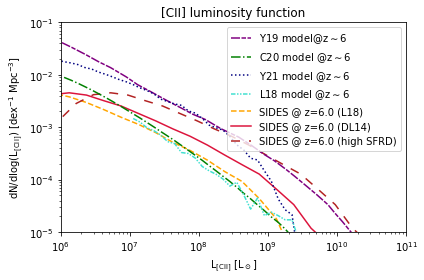

In [50]:
plt.plot(LF_Y19[:,0], LF_Y19[:,1], color = 'purple', linestyle = (0, (6,1,3,1)), label = r'Y19 model@z$\sim$6')

plt.plot(L_Dongwoo, phi_Dongwoo, color = 'green', linestyle = '-.', label = 'C20 model @z$\sim$6')

plt.plot(10.**L_Popping, phi_Popping_6, color = 'navy', linestyle = ':', label = 'Y21 model @z$\sim$6')

plt.plot(10.**meanLCII_L18, LFCII_L18, color = 'turquoise', linestyle = (0, (3,1,1,1,1,1)), label = 'L18 model @z$\sim$6')

i=2
color = ['orange', 'crimson', 'firebrick']
linestyle = ['--','-']
for j in range(0, LFshape[2]): #method
    plt.plot(10.**logLmean, LF_array[:,i,j], linestyle[j], color = color[j], linestyle = linestyle[j],
                 label = 'SIDES @ z={:0.1f} ('.format(zcenlist[i])+method[j]+')', zorder = 0)
    if j==1: #add the high SFRD model
        plt.plot(corrz6*10.**logLmean, LF_array[:,i,j], linestyle = (0, (6, 6)), color = color[2], 
                 label = 'SIDES @ z={:0.1f} ('.format(zcenlist[i])+'high SFRD)', zorder = 0)
    
    
plt.yscale('log')
plt.xscale('log')
plt.xlim([1.e6,1.e11])
plt.ylim([1.e-5,0.1])

plt.xlabel(r'L$_{\rm [CII]}$ [L$_\odot$]')

plt.ylabel(r'dN/dlog(L$_{\rm [CII]}$) [dex$^{-1}$ Mpc$^{-3}$]')

plt.title('[CII] luminosity function', size = 12)

plt.legend()

plt.tight_layout()

plt.savefig('LFCII_model.pdf', dpi=150)

plt.show()